**Bước 1: Import thư viện**

In [ ]:
import pandas as pd #đọc dữ liệu
import numpy as np #xử lý dữ liệu
import matplotlib.pyplot as plt #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model #tải mô hình

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số tuyệt đối trung bình

**Bước 2: Đọc dữ liệu**

In [ ]:
#tạo quyền truy cập với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# đọc dữ liệu từ file csv
df = pd.read_csv('/content/drive/MyDrive/Big data/Dữ liệu Lịch sử VNM 2013_2023.csv')

# Xóa hai dòng "KL" và "Thay đổi %" từ DataFrame dataSet

df = df.drop(columns=["KL", "% Thay đổi"])

# Hiển thị lại DataFrame sau khi xóa
print(df)

            Ngày  Đóng cửa    Mở cửa  Cao nhất Thấp nhất
0     21/07/2023  73,500.0  72,500.0  75,000.0  72,400.0
1     20/07/2023  72,700.0  72,600.0  72,900.0  72,300.0
2     19/07/2023  72,600.0  72,500.0  73,000.0  72,400.0
3     18/07/2023  72,400.0  72,500.0  72,600.0  72,200.0
4     17/07/2023  72,300.0  73,000.0  73,600.0  72,200.0
...          ...       ...       ...       ...       ...
2500  16/07/2013  96,528.0  95,139.0  97,222.0  95,139.0
2501  15/07/2013  95,139.0  95,139.0  95,833.0  94,444.0
2502  12/07/2013  95,139.0  94,444.0  95,139.0  93,750.0
2503  11/07/2013  94,444.0  94,444.0  95,139.0  93,750.0
2504  10/07/2013  94,444.0  95,139.0  95,833.0  94,444.0

[2505 rows x 5 columns]


**Bước 3: EDA**

In [ ]:
#định dạng cấu trúc thời gian
df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [ ]:
#kích thước dữ liệu
df.shape

(2505, 5)

In [ ]:
#dữ liệu 5 dòng đầu
df.head()

,Ngày,Đóng cửa,Mở cửa,Cao nhất,Thấp nhất
0,2023-07-21,"73,500.0","72,500.0","75,000.0","72,400.0"
1,2023-07-20,"72,700.0","72,600.0","72,900.0","72,300.0"
2,2023-07-19,"72,600.0","72,500.0","73,000.0","72,400.0"
3,2023-07-18,"72,400.0","72,500.0","72,600.0","72,200.0"
4,2023-07-17,"72,300.0","73,000.0","73,600.0","72,200.0"


In [ ]:
#xác định kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ngày       2505 non-null   datetime64[ns]
 1   Đóng cửa   2505 non-null   object        
 2   Mở cửa     2505 non-null   object        
 3   Cao nhất   2505 non-null   object        
 4   Thấp nhất  2505 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 98.0+ KB


In [ ]:
#mô tả bộ dữ liệu
df.describe()

,Ngày
count,2505
mean,2018-07-17 16:17:14.730539008
min,2013-07-10 00:00:00
25%,2016-01-13 00:00:00
50%,2018-07-19 00:00:00
75%,2021-01-14 00:00:00
max,2023-07-21 00:00:00


**Bước 4: Tiền xử lý dữ liệu**

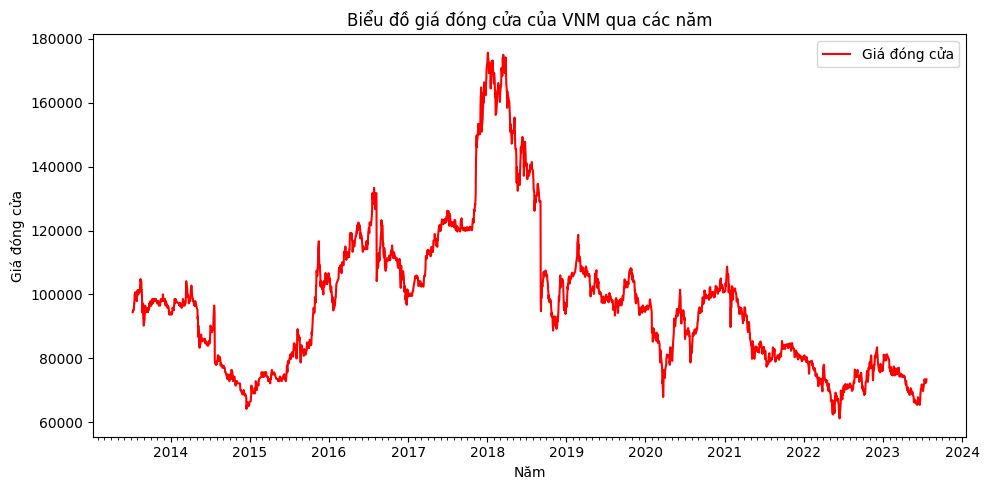

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter, MonthLocator

# Chuyển đổi cột "Ngày" sang dạng datetime
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')

# Sắp xếp lại dữ liệu theo thứ tự thời gian
df = df.sort_values(by='Ngày')

# Chuyển đổi định dạng các cột giá thành số thực
df['Đóng cửa'] = df['Đóng cửa'].str.replace(',', '').astype(float)
df['Mở cửa'] = df['Mở cửa'].str.replace(',', '').astype(float)
df['Cao nhất'] = df['Cao nhất'].str.replace(',', '').astype(float)
df['Thấp nhất'] = df['Thấp nhất'].str.replace(',', '').astype(float)

# Lấy thông tin năm từ cột "Ngày"
df['Năm'] = df['Ngày'].dt.year

# Tạo đồ thị giá đóng cửa qua các năm
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của VNM qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout() # Loại các thành phần trùng lặp
plt.show() # Vẽ biểu đồ


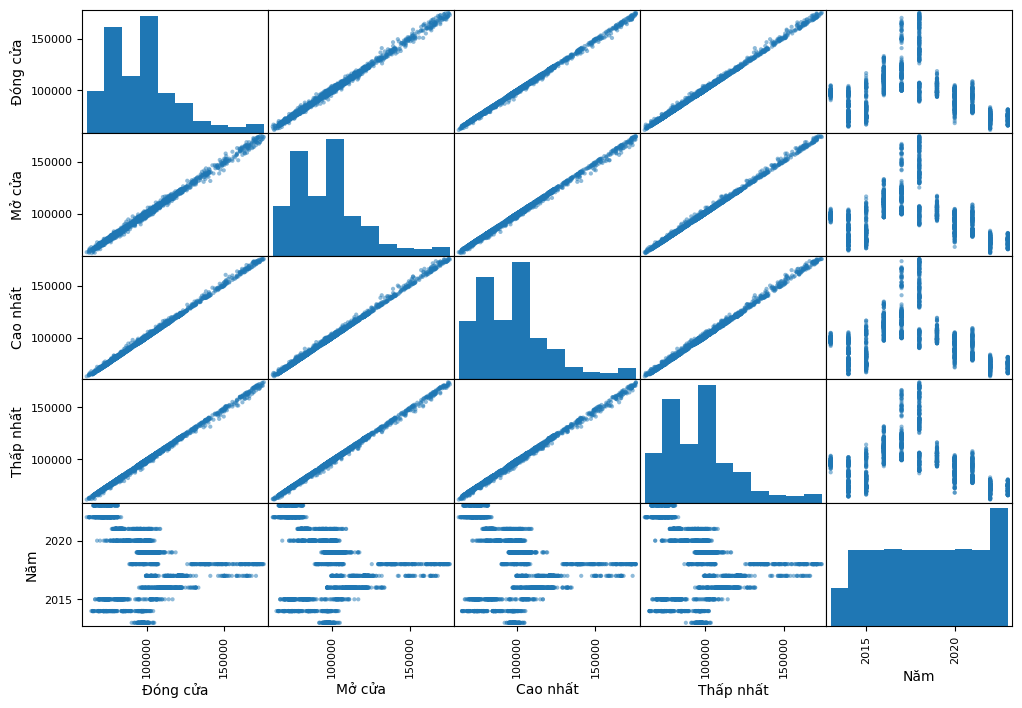

In [ ]:
# Vẽ biểu đồ scatter matrix
pd.plotting.scatter_matrix(df, figsize=(12, 8))
plt.show()


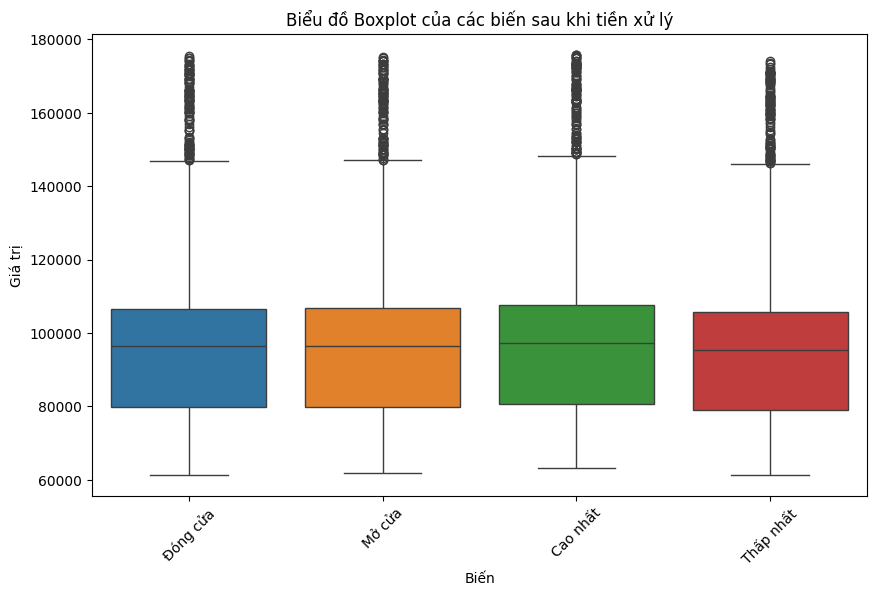

In [ ]:
import seaborn as sns

# Tạo DataFrame chỉ chứa các biến số đã tiền xử lý
df_boxplot = df[['Đóng cửa', 'Mở cửa', 'Cao nhất', 'Thấp nhất']]

# Chuyển đổi dữ liệu thành dạng số thực
df_boxplot = df_boxplot.astype(float)

# Vẽ biểu đồ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title('Biểu đồ Boxplot của các biến sau khi tiền xử lý')
plt.xlabel('Biến')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()


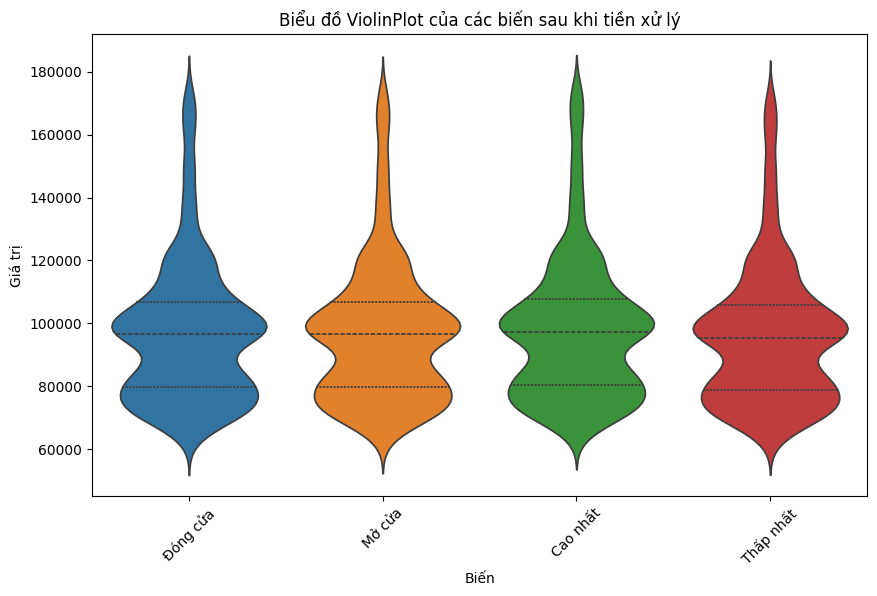

In [ ]:
# Tạo DataFrame chỉ chứa các biến số đã tiền xử lý
df_violinplot = df[['Đóng cửa', 'Mở cửa', 'Cao nhất', 'Thấp nhất']]

# Chuyển đổi dữ liệu thành dạng số thực
df_violinplot = df_violinplot.astype(float)

# Vẽ biểu đồ ViolinPlot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_violinplot, inner="quartile")
plt.title('Biểu đồ ViolinPlot của các biến sau khi tiền xử lý')
plt.xlabel('Biến')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()

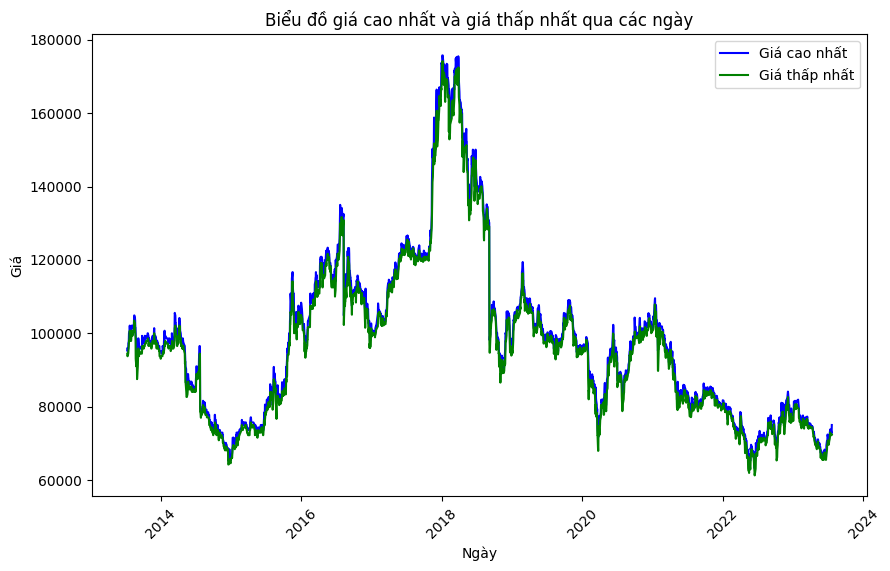

In [ ]:
# Vẽ biểu đồ line
plt.figure(figsize=(10, 6))
plt.plot(df['Ngày'], df['Cao nhất'], label='Giá cao nhất', color='blue')
plt.plot(df['Ngày'], df['Thấp nhất'], label='Giá thấp nhất', color='green')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.title('Biểu đồ giá cao nhất và giá thấp nhất qua các ngày')
plt.legend()
plt.xticks(rotation=45)
plt.show()

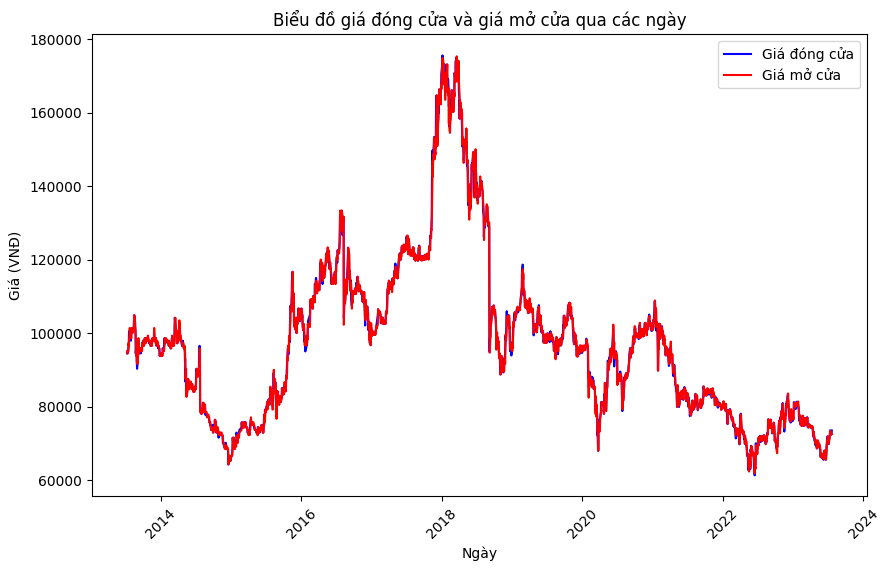

In [ ]:
# Vẽ biểu đồ line
plt.figure(figsize=(10, 6))
plt.plot(df['Ngày'], df['Đóng cửa'], label='Giá đóng cửa', color='blue')
plt.plot(df['Ngày'], df['Mở cửa'], label='Giá mở cửa', color='red')
plt.xlabel('Ngày')
plt.ylabel('Giá (VNĐ)')
plt.title('Biểu đồ giá đóng cửa và giá mở cửa qua các ngày')
plt.legend()
plt.xticks(rotation=45)
plt.show()


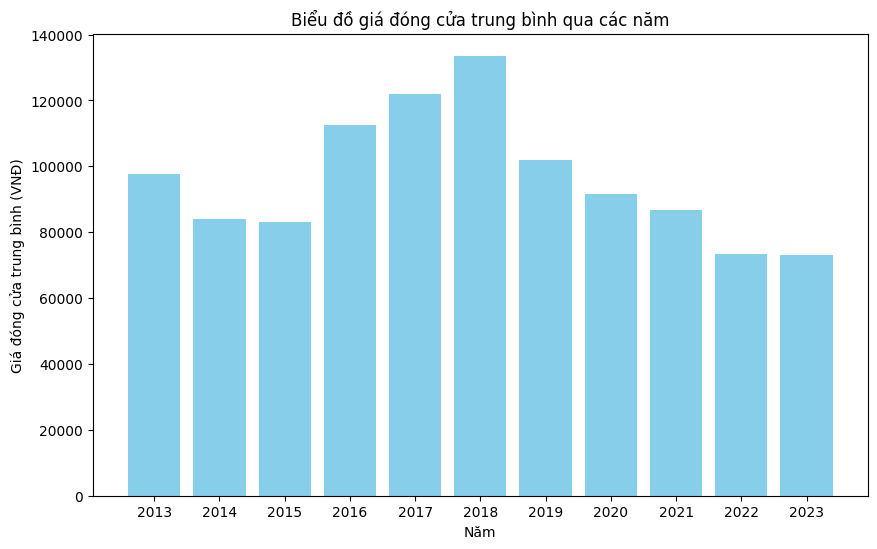

In [ ]:
# Tạo một DataFrame mới với cột năm và giá đóng cửa
df_yearly = df.groupby(df['Ngày'].dt.year).mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df_yearly.index, df_yearly['Đóng cửa'], color='skyblue')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa trung bình (VNĐ)')
plt.title('Biểu đồ giá đóng cửa trung bình qua các năm')
plt.xticks(df_yearly.index)
plt.show()

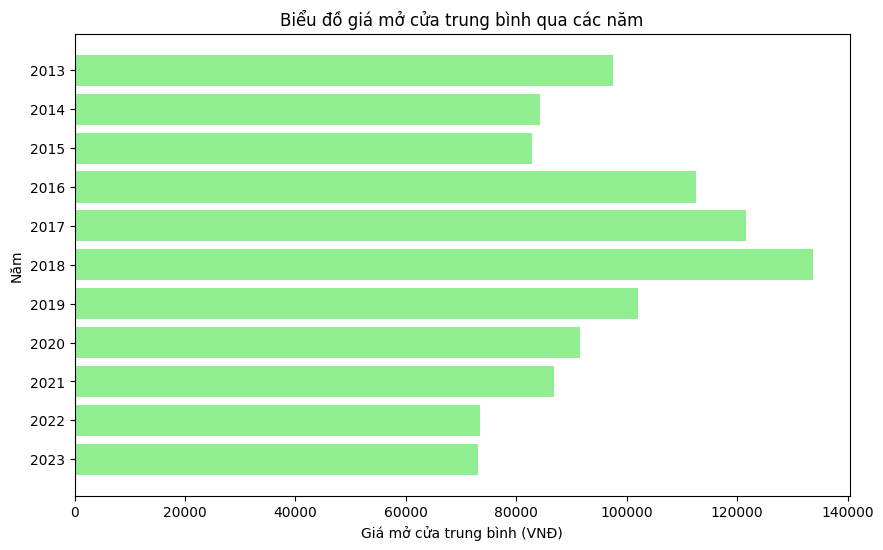

In [ ]:
# Tạo một DataFrame mới với cột năm và giá mở cửa
df_open_yearly = df.groupby(df['Ngày'].dt.year).mean()

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(10, 6))
plt.barh(df_open_yearly.index, df_open_yearly['Mở cửa'], color='lightgreen')
plt.xlabel('Giá mở cửa trung bình (VNĐ)')
plt.ylabel('Năm')
plt.title('Biểu đồ giá mở cửa trung bình qua các năm')
plt.yticks(df_open_yearly.index)  # Đặt nhãn trục y là các năm trong tập dữ liệu
plt.gca().invert_yaxis()  # Đảo ngược trục y để năm gần nhất xuất hiện trên đầu
plt.show()


<ipython-input-27-dc76e7655bd9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Quarter'] = df_2021['Ngày'].dt.quarter


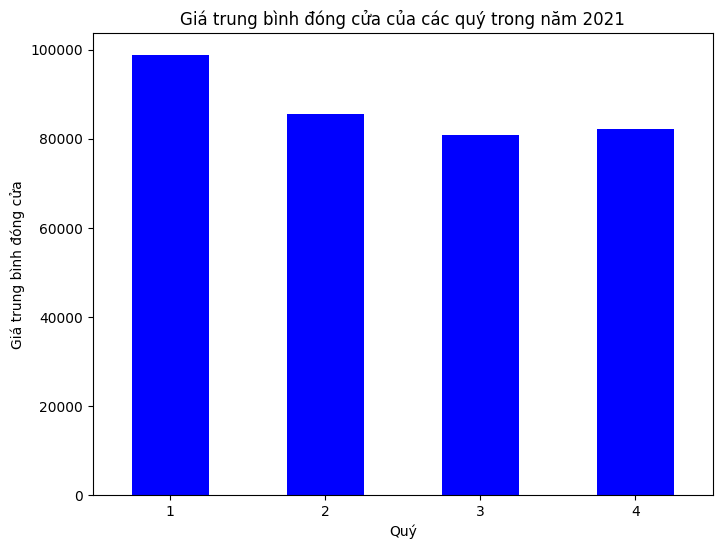

In [ ]:
# Lọc dữ liệu để chỉ chứa các dòng tương ứng với năm 2021
df_2021 = df[df['Ngày'].dt.year == 2021]

# Tạo một cột mới để xác định quý của mỗi ngày
df_2021['Quarter'] = df_2021['Ngày'].dt.quarter

# Tính giá trung bình đóng cửa cho mỗi quý
average_close_price_by_quarter = df_2021.groupby('Quarter')['Đóng cửa'].mean()

# Vẽ biểu đồ của giá trung bình đóng cửa của các quý
plt.figure(figsize=(8, 6))
average_close_price_by_quarter.plot(kind='bar', color='blue')
plt.xlabel('Quý')
plt.ylabel('Giá trung bình đóng cửa')
plt.title('Giá trung bình đóng cửa của các quý trong năm 2021')
plt.xticks(rotation=0)  # Xóa đánh số trên trục x
plt.show()


In [ ]:
# Chọn top 5 ngày có giá cổ phiếu đạt đỉnh
top_5_peak_days = df.nlargest(5, 'Cao nhất')

# In ra bảng top 5 ngày có giá cổ phiếu đạt đỉnh
print("Top 5 ngày có giá cổ phiếu đạt đỉnh:")
print(top_5_peak_days[['Ngày', 'Cao nhất']])


Top 5 ngày có giá cổ phiếu đạt đỉnh:
           Ngày  Cao nhất
1383 2018-01-03  175742.0
1382 2018-01-04  175742.0
1381 2018-01-05  175742.0
1331 2018-03-27  175496.0
1337 2018-03-19  175333.0


In [ ]:
# Chọn top 5 ngày có giá cổ phiếu đạt đáy
top_5_bottom_days = df.nsmallest(5, 'Thấp nhất')

# In ra bảng top 5 ngày có giá cổ phiếu đạt đáy
print("Top 5 ngày có giá cổ phiếu đạt đáy:")
print(top_5_bottom_days[['Ngày', 'Thấp nhất']])


Top 5 ngày có giá cổ phiếu đạt đáy:
          Ngày  Thấp nhất
276 2022-06-15    61260.1
275 2022-06-16    61735.0
297 2022-05-17    61924.9
274 2022-06-17    61924.9
277 2022-06-14    62114.9


In [ ]:
df1 = pd.DataFrame(df,columns=['Ngày','Đóng cửa'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Đóng cửa
Ngày,
2013-07-10,94444.0
2013-07-11,94444.0
2013-07-12,95139.0
2013-07-15,95139.0
2013-07-16,96528.0
...,...
2023-07-17,72300.0
2023-07-18,72400.0
2023-07-19,72600.0


In [ ]:
#chia tập dữ liệu
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [ ]:
data

array([[94444.],
       [94444.],
       [95139.],
       ...,
       [72600.],
       [72700.],
       [73500.]])

In [ ]:
#chuẩn hóa dữ liệu
sc = MinMaxScaler(feature_range=(0,1))
sc_train = sc.fit_transform(data)

In [ ]:
#tạo vòng lặp các giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
  x_train.append(sc_train[i-50:i,0]) #lấy 50 giá đóng cửa liên tục
  y_train.append(sc_train[i,0]) #lấy ra giá đóng cửa ngày hôm sau

In [ ]:
x_train

[array([0.29027738, 0.29027738, 0.29635691, 0.29635691, 0.30850724,
        0.31457803, 0.31457803, 0.33887869, 0.34494948, 0.34494948,
        0.32672836, 0.33279915, 0.33887869, 0.32065757, 0.32672836,
        0.34494948, 0.34494948, 0.35102902, 0.33887869, 0.35102902,
        0.34494948, 0.34494948, 0.34494948, 0.34494948, 0.35709981,
        0.36925013, 0.38140046, 0.37532967, 0.37532967, 0.35102902,
        0.35102902, 0.33279915, 0.29027738, 0.31457803, 0.30850724,
        0.27205626, 0.26598547, 0.25383514, 0.27205626, 0.29027738,
        0.30850724, 0.30850724, 0.29027738, 0.3024277 , 0.3024277 ,
        0.29635691, 0.3024277 , 0.29635691, 0.29635691, 0.29027738]),
 array([0.29027738, 0.29635691, 0.29635691, 0.30850724, 0.31457803,
        0.31457803, 0.33887869, 0.34494948, 0.34494948, 0.32672836,
        0.33279915, 0.33887869, 0.32065757, 0.32672836, 0.34494948,
        0.34494948, 0.35102902, 0.33887869, 0.35102902, 0.34494948,
        0.34494948, 0.34494948, 0.34494948, 0.

In [ ]:
y_train

[0.2963569134842401,
 0.30242770379791795,
 0.2963569134842401,
 0.30242770379791795,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.32065756981190174,
 0.30850724164807086,
 0.3145780319617488,
 0.30850724164807086,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.3267283601255797,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.3145780319617488,
 0.3145780319617488,
 0.32065756981190174,
 0.32065756981190174,
 0.3145780319617488,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.30850724164807086,
 0.32065756981190174,
 0.3267283601255797,
 0.3267283601255797,
 0.32065756981190174,
 0.32065756981190174,
 0.32065756

In [ ]:
#xếp dữ liệu thành 1 mảng 2 chiều
x_train = np.array(x_train)
y_train = np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều để phù hợp với đâu vào của LSTM
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train = np.reshape(y_train,(y_train.shape[0],1))

**Bước 5: Xây dựng và huấn luyện mô hình**

In [ ]:
#xây dựng mô hình
model = Sequential() #tạo lớp mạng cho dữ liệu đầu vào
#2 lớp LSTM
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5)) #loại bỏ 1 số đơn vị tránh học tủ (overfitting)
model.add(Dense(1)) #output đầu ra 1 chiều
#đo sai số tuyệt đối trung bình có sử dụng trình tối ưu hóa adam
model.compile(loss='mean_absolute_error',optimizer='adam')

In [ ]:
#huấn luyện mô hình
save_model = "/content/drive/MyDrive/Big data/save_model.hdf5"
best_model = ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.10216, saving model to /content/drive/MyDrive/Big data/save_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 - 7s - loss: 0.1022 - 7s/epoch - 238ms/step
Epoch 2/100

Epoch 2: loss improved from 0.10216 to 0.05541, saving model to /content/drive/MyDrive/Big data/save_model.hdf5
29/29 - 4s - loss: 0.0554 - 4s/epoch - 144ms/step
Epoch 3/100

Epoch 3: loss improved from 0.05541 to 0.05259, saving model to /content/drive/MyDrive/Big data/save_model.hdf5
29/29 - 4s - loss: 0.0526 - 4s/epoch - 134ms/step
Epoch 4/100

Epoch 4: loss improved from 0.05259 to 0.04921, saving model to /content/drive/MyDrive/Big data/save_model.hdf5
29/29 - 3s - loss: 0.0492 - 3s/epoch - 97ms/step
Epoch 5/100

Epoch 5: loss improved from 0.04921 to 0.04814, saving model to /content/drive/MyDrive/Big data/save_model.hdf5
29/29 - 3s - loss: 0.0481 - 3s/epoch - 99ms/step
Epoch 6/100

Epoch 6: loss improved from 0.04814 to 0.04559, saving model to /content/drive/MyDrive/Big data/save_model.hdf5
29/29 - 3s - loss: 0.0456 - 3s/epoch - 104ms/step
Epoch 7/100

Epoch 7: loss improved from 0.04559 to 0.04411, saving model to 

In [ ]:
#dữ liệu train
y_train = sc.inverse_transform(y_train) #giá thực
final_model = load_model("/content/drive/MyDrive/Big data/save_model.hdf5")
y_train_predict = final_model.predict(x_train) #dự đoán giá đóng cửa trên tập đã train
y_train_predict = sc.inverse_transform(y_train_predict) #giá dự đoán

46/46 [==============================] - 3s 36ms/step


**Bước 6: Tái sử dụng mô hình**

In [ ]:
#xử lý dữ liệu test
test = df1[len(train_data)-50:].values
test = test.reshape(-1,1)
sc_test = sc.transform(test)

x_test = []
for i in range(50,test.shape[0]):
  x_test.append(sc_test[i-50:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test = data[1500:] #giá thực
y_test_predict = final_model.predict(x_test)
y_test_predict = sc.inverse_transform(y_test_predict) #giá dự đoán

32/32 [==============================] - 1s 30ms/step


**Độ chính xác của mô hình**

<ipython-input-40-4f5867c1eb90>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
<ipython-input-40-4f5867c1eb90>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu


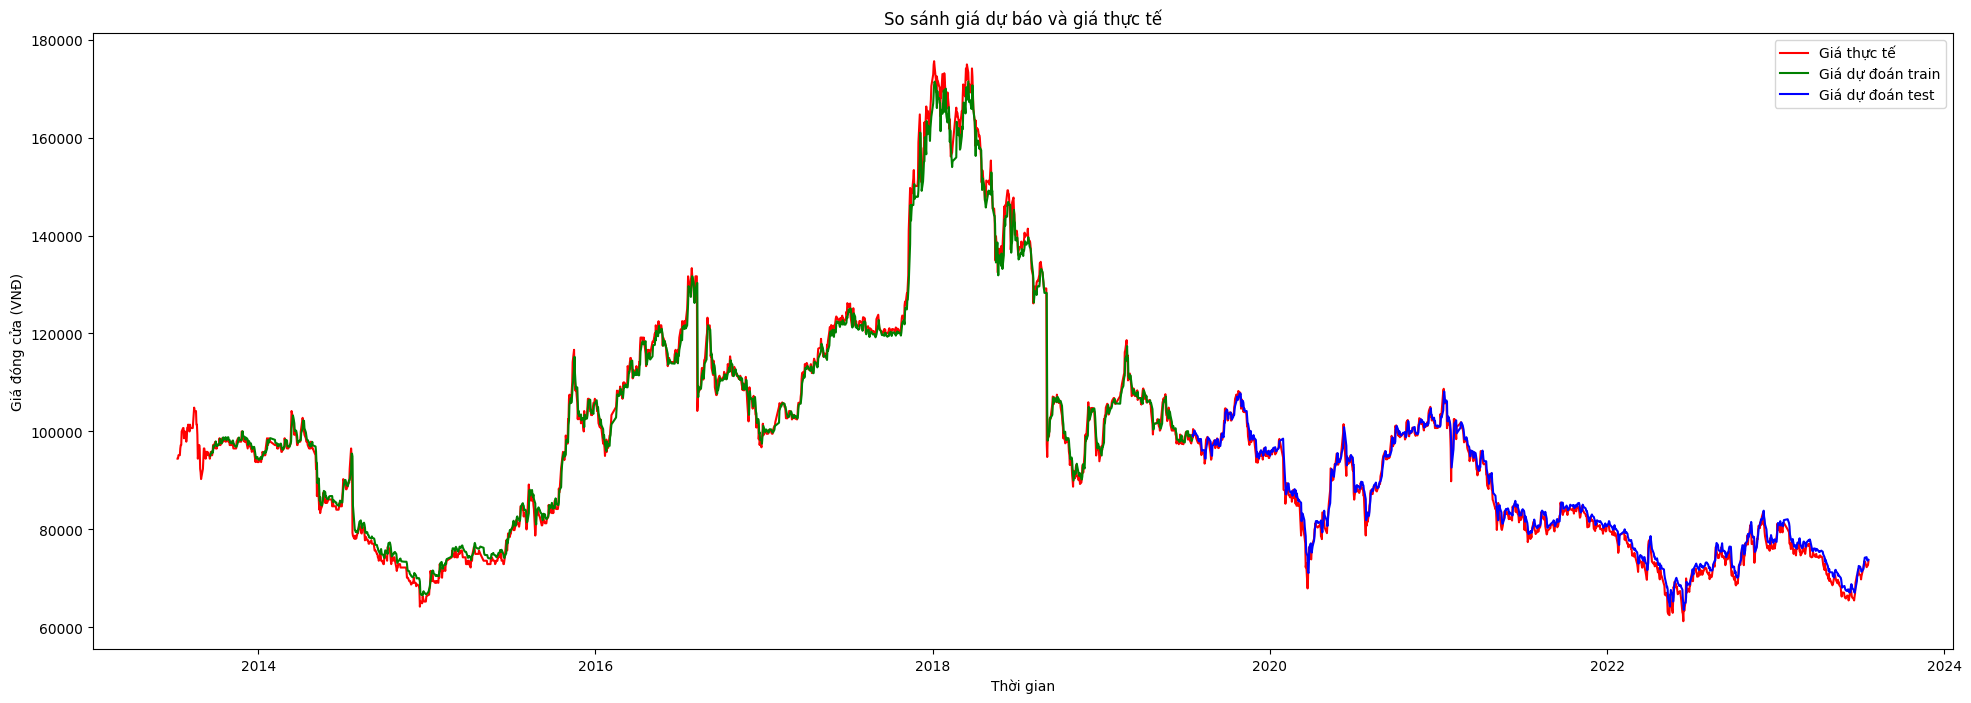

In [ ]:
#lập biểu đồ so sánh
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24,8))
plt.plot(df1,label='Giá thực tế',color='red') #đường giá thực
train_data1['Dự đoán'] = y_train_predict #thêm dữ liệu
plt.plot(train_data1['Dự đoán'],label='Giá dự đoán train',color='green') #đường giá dự báo train
test_data1['Dự đoán'] = y_test_predict #thêm dữ liệu
plt.plot(test_data1['Dự đoán'],label='Giá dự đoán test',color='blue') #đường giá dự báo test
plt.title('So sánh giá dự báo và giá thực tế') #đặt tên biểu đồ
plt.xlabel('Thời gian') #đặt tên hàm x
plt.ylabel('Giá đóng cửa (VNĐ)') #đặt tên hàm y
plt.legend() #chú thích
plt.show()

In [ ]:
#r2
print('Độ phù hợp tập train:',r2_score(y_train,y_train_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập train (VNĐ):',mean_absolute_error(y_train,y_train_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập train:',mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train: 0.9913543334832119
Sai số tuyệt đối trung bình trên tập train (VNĐ): 1419.86734375
Phần trăm sai số tuyệt đối trung bình tập train: 0.013307504338148852


In [ ]:
train_data1

,Đóng cửa,Dự đoán
Ngày,,
2013-09-19,95139.0,95052.992188
2013-09-20,95833.0,95383.554688
2013-09-23,95139.0,95973.687500
2013-09-24,95833.0,95641.734375
2013-09-25,97222.0,96009.757812
...,...,...
2019-07-11,99133.0,99219.148438
2019-07-12,98183.0,99322.984375
2019-07-15,97549.0,98676.601562


In [ ]:
#r2
print('Độ phù hợp tập test:',r2_score(y_test,y_test_predict))
#mae
print('Sai số tuyệt đối trung bình trên tập test (VNĐ):',mean_absolute_error(y_test,y_test_predict))
#mae
print('Phần trăm sai số tuyệt đối trung bình tập test:',mean_absolute_percentage_error(y_test,y_test_predict))

Độ phù hợp tập test: 0.979623955118417
Sai số tuyệt đối trung bình trên tập test (VNĐ): 1252.2377798507462
Phần trăm sai số tuyệt đối trung bình tập test: 0.015525476686572824


In [ ]:
test_data1

,Đóng cửa,Dự đoán
Ngày,,
2019-07-18,98658.0,99232.007812
2019-07-19,100479.0,98993.164062
2019-07-22,99371.0,100195.750000
2019-07-23,99291.0,99752.210938
2019-07-24,99450.0,99546.773438
...,...,...
2023-07-17,72300.0,74342.562500
2023-07-18,72400.0,73795.546875
2023-07-19,72600.0,73611.179688


**Dự đoán tương lai so với giá ngày cuối**

1/1 [==============================] - 0s 46ms/step


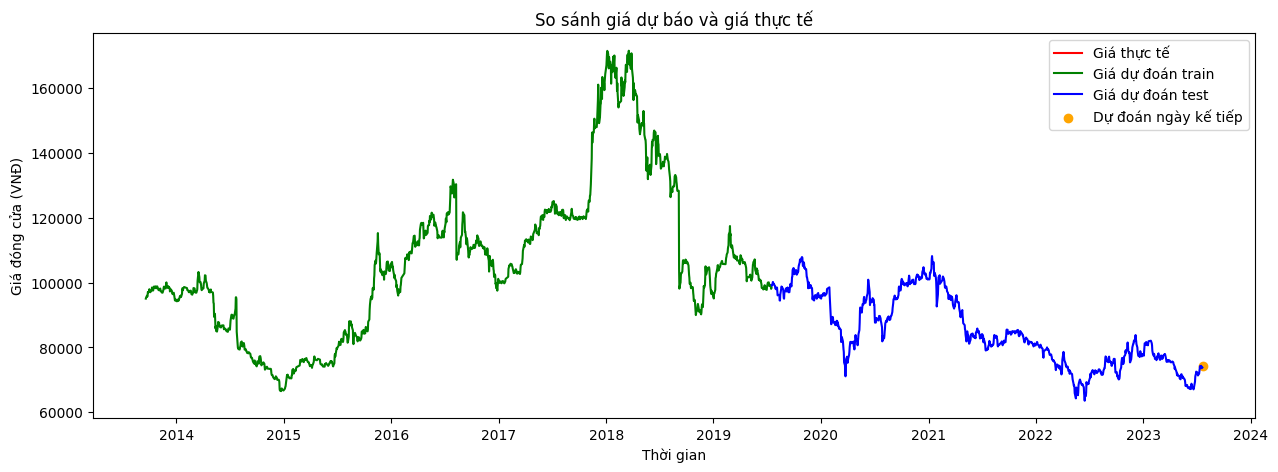

In [ ]:
# Lấy ngày kế tiếp sau ngày cuối cùng trong tập dữ liệu để dự đoán
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)

# Chuyển đổi ngày kế tiếp sang dạng datetime
next_date = pd.to_datetime(next_date)

# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
next_closing_price = np.array([df['Đóng cửa'].iloc[-1]])  # Lấy giá trị đóng cửa của ngày cuối cùng

# Chuẩn hóa giá trị của ngày cuối cùng
next_closing_price_normalized = sc.transform(next_closing_price.reshape(-1, 1))  # Chuyển thành mảng 2D

# Tạo dự đoán cho ngày kế tiếp bằng mô hình đã huấn luyện
x_next = np.array([sc_train[-50:, 0]])  # Lấy 50 giá đóng cửa gần nhất
x_next = np.reshape(x_next, (x_next.shape[0], x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)

# Thêm dữ liệu dự đoán của ngày kế tiếp vào DataFrame
df_next = pd.DataFrame({'Ngày': [next_date], 'Đóng cửa': [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

# Vẽ biểu đồ mới với dự đoán cho ngày kế tiếp
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Đóng cửa'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()


In [ ]:
# Lấy giá trị của ngày cuối cùng trong tập dữ liệu
actual_closing_price = df['Đóng cửa'].iloc[-1]

# Tạo DataFrame so sánh giá dự đoán với giá ngày cuối trong tập dữ liệu
comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 'Giá ngày trước': [actual_closing_price]})

# In ra bảng so sánh
print(comparison_df)

        Ngày   Giá dự đoán  Giá ngày trước
0 2023-07-22  74317.773438         73500.0
